In [9]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

home = os.path.expanduser('~')
pretrained_loc = os.path.join(home, 'turing', 'overflow-storage', 'EDSR_x2.pt')

pretrained_dict = torch.load(pretrained_loc)

In [10]:
pretrained_dict.keys()
for name, item in pretrained_dict.items():
    print(name, item.size())

sub_mean.weight torch.Size([3, 3, 1, 1])
sub_mean.bias torch.Size([3])
add_mean.weight torch.Size([3, 3, 1, 1])
add_mean.bias torch.Size([3])
head.0.weight torch.Size([256, 3, 3, 3])
head.0.bias torch.Size([256])
body.0.body.0.weight torch.Size([256, 256, 3, 3])
body.0.body.0.bias torch.Size([256])
body.0.body.2.weight torch.Size([256, 256, 3, 3])
body.0.body.2.bias torch.Size([256])
body.1.body.0.weight torch.Size([256, 256, 3, 3])
body.1.body.0.bias torch.Size([256])
body.1.body.2.weight torch.Size([256, 256, 3, 3])
body.1.body.2.bias torch.Size([256])
body.2.body.0.weight torch.Size([256, 256, 3, 3])
body.2.body.0.bias torch.Size([256])
body.2.body.2.weight torch.Size([256, 256, 3, 3])
body.2.body.2.bias torch.Size([256])
body.3.body.0.weight torch.Size([256, 256, 3, 3])
body.3.body.0.bias torch.Size([256])
body.3.body.2.weight torch.Size([256, 256, 3, 3])
body.3.body.2.bias torch.Size([256])
body.4.body.0.weight torch.Size([256, 256, 3, 3])
body.4.body.0.bias torch.Size([256])
body

In [11]:
import torch.nn as nn

model = nn.Sequential(nn.Conv3d(64, 128, kernel_size=(3,3,3), padding=(1,1,1)))
for name, item in model.state_dict().items():
    print(name, item.size())

0.weight torch.Size([128, 64, 3, 3, 3])
0.bias torch.Size([128])


In [12]:
def normalise_lf(sample):
    """Coverts an lf in the range 0 to maximum into -1 1"""
    maximum = 255.0
    lf = sample['colour']
    lf.div_(maximum).mul_(2.0).add_(-1.0)
    return sample

(64, 512, 512, 3)
[[[21 47 50]
  [21 45 48]
  [21 43 47]
  ...
  [58 47 40]
  [59 48 40]
  [59 47 40]]

 [[21 47 50]
  [21 45 48]
  [21 44 47]
  ...
  [58 47 40]
  [60 48 41]
  [59 48 40]]

 [[21 47 50]
  [21 46 49]
  [23 45 48]
  ...
  [59 47 40]
  [60 48 41]
  [59 48 40]]

 ...

 [[39 18 14]
  [40 18 14]
  [40 18 14]
  ...
  [30 14 16]
  [30 15 16]
  [30 15 16]]

 [[40 18 14]
  [40 18 14]
  [41 18 14]
  ...
  [30 14 16]
  [29 14 16]
  [30 15 17]]

 [[40 18 14]
  [41 19 15]
  [41 19 14]
  ...
  [29 14 16]
  [30 15 17]
  [29 14 16]]]
torch.Size([1, 512, 512, 3])
tensor([[  21,   47,   50,  ...,   15,   20,   23],
        [  21,   45,   48,  ...,   15,   20,   23],
        [  21,   43,   47,  ...,   14,   20,   22],
        ...,
        [  58,   47,   40,  ...,   55,   48,   43],
        [  59,   48,   40,  ...,   54,   48,   43],
        [  59,   47,   40,  ...,   55,   48,   43]], dtype=torch.uint8)
torch.Size([512, 512, 192])
torch.Size([64, 512, 512, 3])
tensor([[[  21,   47,   50],

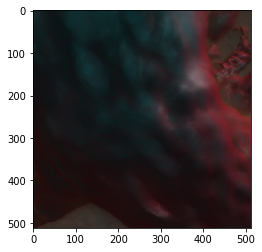

In [77]:
output_dir = '/users/pgrad/martins7/turing/overflow-storage/numpy_set'
#output_dir='/media/martins7/TOSHIBA EXT/lf_volume_sets'
hdf5_name = 'lf_set.h5'
loc = os.path.join(output_dir, hdf5_name)

with h5py.File(loc, mode='r', libver='latest', swmr=True) as hdf:
    colour_images = hdf['val/colour/images']
    print(colour_images[0].shape)
    print(colour_images[0, 0])
    print(test[0].shape)
    out3 = torch.squeeze(torch.cat(torch.chunk(input_t, 64, dim=0), dim=-1))
    
    # To concatenate into RBG channels use
    #out3 = torch.squeeze(torch.cat(torch.chunk(input_t, 3, dim=-1)))
    # The problem is I'm not sure how to get the input back quickly...
    
    print(out3[0])
    print(out3.shape)
    plt.imshow(out3[:, :, :3].numpy())
    input_back = torch.stack(torch.chunk(out3, 64, dim=-1))
    print(input_back.shape)
    print(input_back[0])
